In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.ioff()
import os
os.chdir("/content/drive/MyDrive/Tensorflow Advance/Practice/LinearRegression/")
from PIL import Image
import imageio

print("Version of tensorflow is : ",tf.__version__)
random.seed(100)

In [140]:
dataframe = pd.read_csv('./data.csv' , names = ['data' , 'label'])
os.chdir('./Pics')

In [129]:
X_train, X_test, y_train, y_test = train_test_split(dataframe['data'], dataframe['label'],
                                                    test_size=0.33, random_state=42)

In [130]:
X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test  = y_test.values

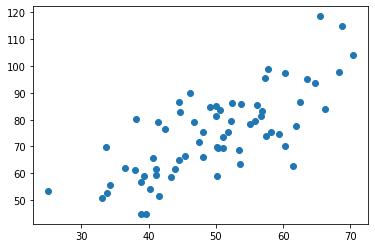

In [131]:
plt.plot(X_train , y_train , 'o')

In [132]:
mean_x = np.mean(X_train)
X_train = X_train - mean_x
std_x  = np.std(X_train)
X_train = X_train / std_x

mean_y = np.mean(y_train)
y_train = y_train - mean_y
std_y  = np.std(y_train)
y_train = y_train / std_y

X_test = X_test - mean_x
X_test = X_test / std_x
y_test = y_test - mean_y
y_test = y_test / std_y

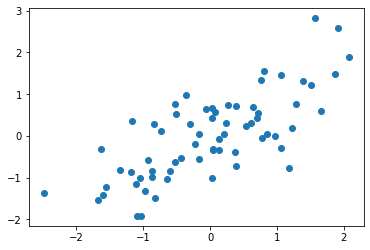

In [133]:
plt.plot(X_train , y_train , 'o')

In [134]:
class MyModel():
    def __init__(self):
        self.w = tf.Variable(3.0 , trainable=True , name="weight")
        self.b = tf.Variable(1.0 , trainable=True , name="kernal")

    def __call__(self , input):
        return self.w * input + self.b

In [135]:
def get_loss(y_true , y_pred):
    return tf.reduce_mean(tf.square( y_true - y_pred ))

In [136]:
def doOptimization(model , x , y_true , learning_rate):
    with tf.GradientTape() as tape:
        pred = model(x)
        loss = get_loss(y_true=y_true , y_pred=pred)
    dw , db = tape.gradient(loss , [model.w , model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

    return loss

In [145]:
def train_model(model , x , y , test_x , test_y , epochs = 1000 , learning_rate = 0.001 ,
                print_freq = None , save_frq = None):
    history = {}
    history['loss'] = []
    history['val_loss'] = []
    history['w'] = []
    history['b'] = []
    image = []
    for epoch in range(epochs):
        loss     = doOptimization(model , x , y , learning_rate)
        val_loss = get_loss(y_test , model(test_x))

        history['loss'].append(loss.numpy())
        history['val_loss'].append(val_loss.numpy())
        history['w'].append(model.w.numpy())
        history['b'].append(model.b.numpy())

        if save_frq != None and ((epoch+1) % save_frq == 0 or epoch == 0) :
            plt.clf()
            f , ax = plt.subplots(1,2,figsize=(16 , 5))
            ax[0].plot(history['loss'] , label = "Train_loss")
            ax[0].plot(history['val_loss'] , label = "Test_loss")
            ax[0].legend()

            ax[1].plot(X_train , y_train , 'o' , label="True Val")
            ax[1].plot(X_train , model(X_train).numpy() , 'r' , label="prediction")
            ax[1].legend()
            ax[0].set_title("EPOCH : %d"%epoch)
            ax[1].set_title("EPOCH : %d"%epoch)
            name = "pic%d.png"%epoch
            plt.savefig(name)
            image_ = Image.open(name)
            image.append(np.array(image_))

        if print_freq != None and ((epoch+1) % print_freq == 0 or epoch == 0):
            print("Epoch  %6d   ====  Loss : %2.3f    Val_Loss : %2.3f    ===    w : %2.3f    b : %2.3f"%
                  (epoch+1 , loss , val_loss , model.w,model.b))
            
            plt.show()
            
            

    imageio.mimsave('./animation.gif' , image , fps = 1)
    return history

Epoch       1   ====  Loss : 6.540    Val_Loss : 3.890    ===    w : 2.998    b : 0.999


<Figure size 432x288 with 0 Axes>

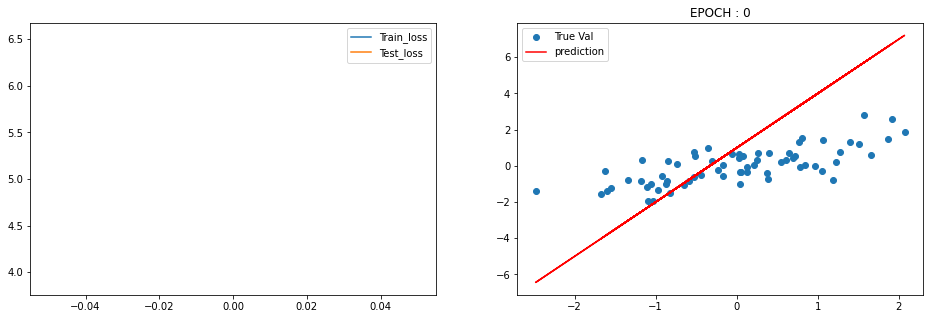

Epoch    1000   ====  Loss : 1.273    Val_Loss : 0.744    ===    w : 1.573    b : 0.368


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

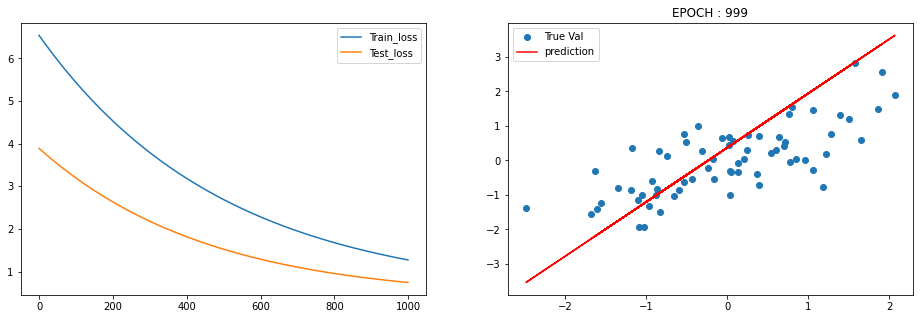

Epoch    2000   ====  Loss : 0.559    Val_Loss : 0.460    ===    w : 1.048    b : 0.135


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

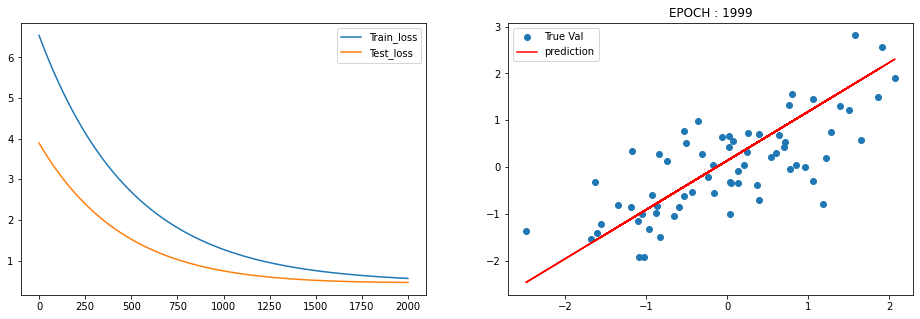

Epoch    3000   ====  Loss : 0.463    Val_Loss : 0.474    ===    w : 0.855    b : 0.050


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

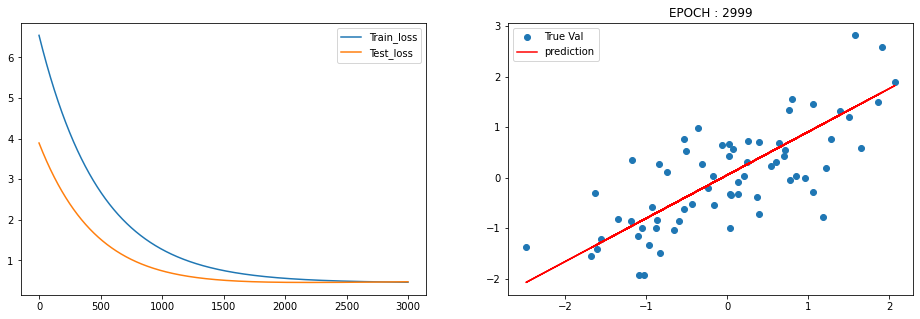

Epoch    4000   ====  Loss : 0.450    Val_Loss : 0.495    ===    w : 0.785    b : 0.018


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

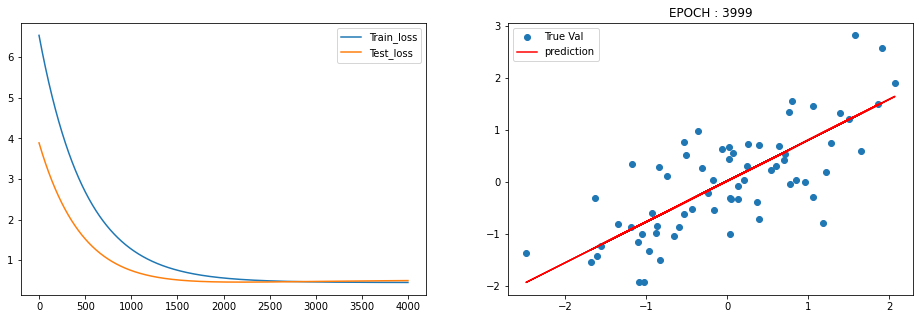

Epoch    5000   ====  Loss : 0.448    Val_Loss : 0.505    ===    w : 0.758    b : 0.007


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

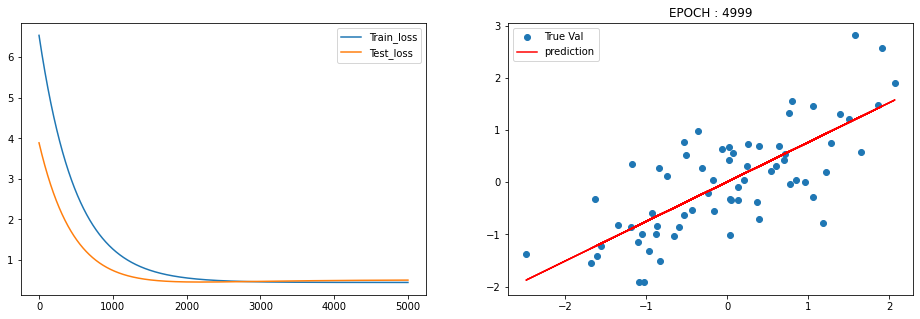

Epoch    6000   ====  Loss : 0.448    Val_Loss : 0.509    ===    w : 0.749    b : 0.002


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

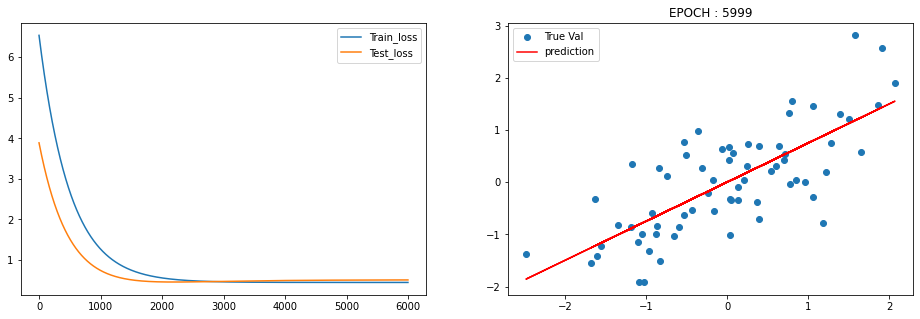

In [147]:
model = MyModel()
history = train_model(model , X_train , y_train , X_test , y_test , learning_rate=0.0005 ,print_freq=1000 , 
                      epochs=6000 , save_frq = 100)